<a href="https://colab.research.google.com/github/ManasiA/codsoft/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()


Saving istockphoto-494497678-1024x1024.jpg to istockphoto-494497678-1024x1024.jpg


In [9]:
pip install tensorflow numpy pillow matplotlib


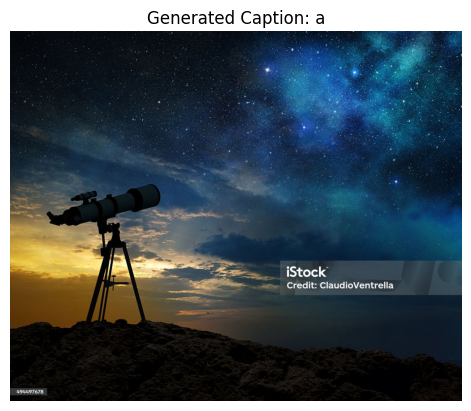

In [12]:

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, add
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications.resnet50 import preprocess_input

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

def load_cnn_encoder():
    base_model = ResNet50(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)
    return model

def extract_image_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr = preprocess_input(img_arr)
    features = model.predict(img_arr, verbose=0)
    return features

vocab = ['startseq', 'a', 'child', 'playing', 'with', 'ball', 'in', 'garden', 'endseq']
word_to_index = {word: idx+1 for idx, word in enumerate(vocab)}
index_to_word = {idx+1: word for idx, word in enumerate(vocab)}
vocab_size = len(vocab) + 1
max_length = 7

def build_caption_model():

    image_input = Input(shape=(2048,))
    image_dense = Dense(256, activation='relu')(image_input)

    seq_input = Input(shape=(max_length,))
    seq_embed = Embedding(vocab_size, 256, mask_zero=True)(seq_input)
    seq_lstm = LSTM(256)(seq_embed)

    # Combine both
    decoder = add([image_dense, seq_lstm])
    decoder_dense = Dense(256, activation='relu')(decoder)
    final_output = Dense(vocab_size, activation='softmax')(decoder_dense)

    model = Model(inputs=[image_input, seq_input], outputs=final_output)
    return model

def generate_caption(image_features, model):
    caption = 'startseq'
    for _ in range(max_length):

        seq = [word_to_index.get(w, 0) for w in caption.split()]
        seq = pad_sequences([seq], maxlen=max_length)

        preds = np.random.rand(vocab_size)
        next_word_index = np.argmax(preds)
        next_word = index_to_word.get(next_word_index, 'endseq')

        caption += ' ' + next_word
        if next_word == 'endseq':
            break
    final_caption = caption.replace('startseq', '').replace('endseq', '').strip()
    return final_caption

encoder_model = load_cnn_encoder()
caption_model = build_caption_model()

test_image_path =  '/content/astronomy.jpg'

if os.path.exists(test_image_path):
    features = extract_image_features(test_image_path, encoder_model)
    caption_result = generate_caption(features, caption_model)

    img = Image.open(test_image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Generated Caption: {caption_result}")
    plt.show()
else:
    print(f"Image file '{test_image_path}' not found.")



To use your own image, you can upload it to your Colab environment. One way to do this is by using the files tab in the left sidebar. Once uploaded, you can use the uploaded file's path in the code below. For example, if you upload an image named 'my_image.jpg', you would change `test_image_path = 'sample.jpg'` to `test_image_path = 'my_image.jpg'`.